# Домашнее задание 4

$\begin{align}
& 1.\ Сгенерируйте \ датасет\ из\ 500\ точек\ на\ плоскости,\ для\ которых\ y = 0.5x + 1 + \epsilon,\ где\ \epsilon \sim \mathcal{N}(0, 0.2) \\
&(воспользуйтесь\ модулем\ numpy.random)\end{align}$

In [2]:
# your code here
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]

np.random.seed(0)
x = np.linspace(0, 1, 500)
y = 0.5 * x + 1 + np.sqrt(0.2) * np.random.randn(500)

$\begin{align}
&  2.\ Визуализируйте\ выборку
\end{align}$

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

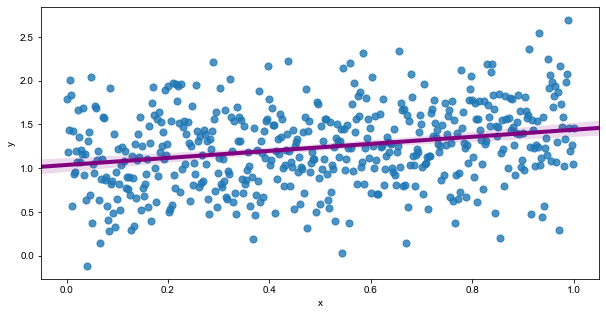

In [3]:
# your code here
ax = sns.regplot(x, y, scatter=True, line_kws={'lw':4, 'color':'purple'}, scatter_kws={'s': 50})
sns.set(font_scale=1)
ax.set(xlabel='x', ylabel='y')

$\begin{align}
&\ 3.\ Восстановите\ по\ выборке\ зависимость\ y(x),\ считая,\ что\ зависимость\ имеет\ вид\ y\ =\ ax+b,
и\ минимизируя\\ & среднеквадратическое\ отклонение\ на\ обучающей\  выборке,\ воспользовавшись\ scipy.optimize.minimize. \\
& Визуализируйте\ восстановленную\ прямую.
\end{align}$

      fun: 71.39855677014722
 hess_inv: array([[ 0.01723258, -0.00854831],
       [-0.00854831,  0.005669  ]])
      jac: array([-9.53674316e-07,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.36140688, 1.04407591])


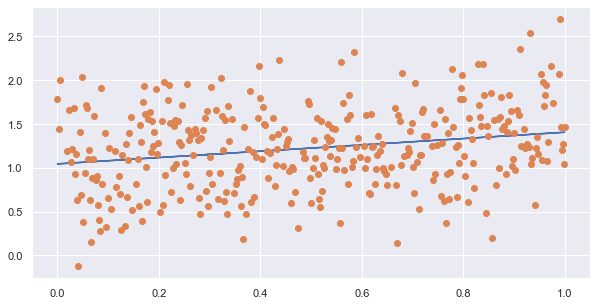

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
x_vec = x.reshape(-1, 1)
y_vec = y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, 
                                                    test_size=0.3, 
                                                    random_state=0)
def f(params, x, y):
    a = params[0]
    b = params[1]
    return np.sum((a * x + b - y)**2)

initial_a_b = [0.0, 0.0]
result = minimize(f, initial_a_b, args=(x_train, y_train))
print(result)
plt.plot(x_train, result.x[0] * x_train + result.x[1])
plt.plot(x_train, y_train, 'o')

$
\begin{align}
& \ 4.\ Добавьте\ теперь\ в\ выборку\ 75\ точек,\ для\ которых\ y = 1 + \epsilon ,\ а\ x\ принимает\ различные\ 
значения\ из\ того\ же\ диапазона,\\ &  что\ и\ у\ уже\ имевшихся\ точек\ в\ обучающей\ выборке.\ По\ новой\ расширенной\ выборке\ снова\ попробуйте\ восстановить\\ & зависимость\ y(x) = ax + b\ 
двумя\ способами:\\ & \cdot минимизируя\ среднеквадратическое\ отклонение\ и\\ & \cdot минимизируя\ среднее\ абсолютное\ отклонение.\\ & Визуализируйте\ полученные\ 
прямые\ и\ сгенерированный\ датасет\ на\ одном\ изображении.
\end{align}$

Mean square error

      fun: 122.38175447837654
 hess_inv: array([[ 0.01036214, -0.00518107],
       [-0.00518107,  0.0034601 ]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.35853601, 1.02015911])

Mean abs error

      fun: 211.79343906089406
 hess_inv: array([[ 0.01556687, -0.01068492],
       [-0.01068492,  0.00760786]])
      jac: array([0.49187469, 1.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 273
      nit: 7
     njev: 67
   status: 2
  success: False
        x: array([0.32344356, 1.04132258])


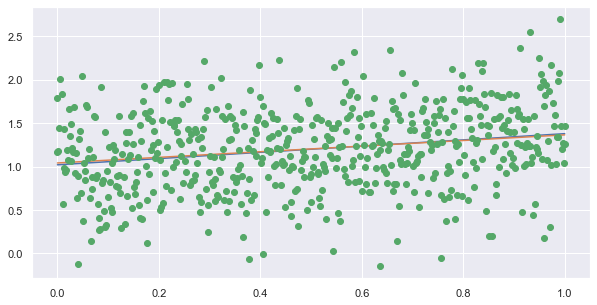

In [5]:
# your code here
x_75 = np.linspace(0, 1, 75)
y_75 = 1 + np.sqrt(0.2) * np.random.randn(75)

x_575 = np.concatenate([x, x_75])
y_575 = np.concatenate([y, y_75])

x_vec = x_575.reshape(-1, 1)
y_vec = y_575.reshape(-1, 1)


x_train = x_vec
y_train = y_vec

def f_2(params, x, y):
    a = params[0]
    b = params[1]
    return np.sum((a * x + b - y)**2)

def f_abs(params, x, y):
    a = params[0]
    b = params[1]
    return np.sum(abs(a * x + b - y))

initial_a_b = [0.0, 0.0]
result = minimize(f_2, initial_a_b, args=(x_train, y_train))
print('Mean square error\n')
print(result)
plt.plot(x_train, result.x[0] * x_train + result.x[1])

initial_a_b = [1.0, 1.0]
result = minimize(f_abs, initial_a_b, args=(x_train, y_train))
print('\nMean abs error\n')
print(result)
plt.plot(x_train, result.x[0] * x_train + result.x[1])

plt.plot(x_train, y_train, 'o')


$\begin{align}
& \ 5.\ На\ основе\ полученных\ графиков\ сделайте\ вывод\ об\ устойчивости\ моделей,\ оптимизирующих\ среднеквадратическое\\ & отклонение\ и\ среднее\ абсолютное\ отклонение,\ к\ выбросам.
\end{align}$

Модель, оптимизирующая среднее абсолютное отклонение, менее устойчива к выбросам

$
\begin{align}
\ 6.\ Реализуйте\ линейную\ регрессию\ (используйте\ векторизованные\ операции\ из\ библиотеки\ numpy)
\end{align}$

$
\begin{align}
Пример\ векторизованных\ операций
\end{align}$

In [7]:
import numpy as np
# Пример: скалярное произведение векторов
vec1 = np.random.randn(10000,)
vec2 = np.random.randn(10000,)

In [8]:
# С использованием цикла
prod = 0
for i in range(len(vec1)):
    prod += vec1[i] * vec2[i]

# С использованием векторизованных операций
prod_vect = vec1 @ vec2 # или np.dot(vec1, vec2)

print(np.isclose(prod, prod_vect))

True


$\begin{align}
Это\ нужно\ для\ ускорения\ вычислений
\end{align}$

In [7]:
%%time
# магическая команда (magic command) time выводит время исполнения ячейки

# матричное умножение с использованием циклов
m, n, l = 100, 500, 400
mat1 = np.random.randn(m, l)
mat2 = np.random.randn(l, n)
mat_res = np.zeros((m, n))
for i in range(mat_res.shape[0]):
    for j in range(mat_res.shape[1]):
        for k in range(mat1.shape[1]):
            mat_res[i, j] += mat1[i, k] * mat2[k, j]

Wall time: 23.9 s


In [8]:
%%time

# матричное умножение с использованием векторизованных операций
mat_res_vec = mat1 @ mat2

Wall time: 2 ms


In [9]:
print(np.allclose(mat_res, mat_res_vec))

True


In [9]:
class MyLinearRegression:
    def __init__(self, n_iter=1000):
        self.w = None
        self.n_iter = n_iter # число итераций
        self.lambda_ = 0.01 # шаг градиентного спуска
        
    def fit(self, X, y):
        # инициализация весов модели
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))
        
        self.w = np.zeros((X.shape[1], 1))
        
        # напишите цикл, на каждом шаге которого
        # обновляются веса модели
        # начало кода
        for i in range(self.n_iter):
            self.w = self.w - self.lambda_ * 2 * X.T @ (X @ self.w - y) / X.shape[0]
        # конец кода
    
    # напишите функцию ошибки
    # (среднеквадратическое отклонение)
    def loss(self, y_true, X):
        # начало кода
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))
        
        return (X @ self.w - y_true).T @ (X @ self.w - y_true)
        # конец кода
        
    # напишите предсказание модели 
    def predict(self, X):
        # начало кода
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X)) 
        
        return X @ self.w
        # конец кода

$
\begin{align}
Проверка\  линейной\ регрессии
\end{align}$

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.random.seed(2020)
x = np.linspace(0, 10, 500)
y = 0.5 * x + 1 + np.sqrt(0.2) * np.random.randn(500)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2020)
linear_model = MyLinearRegression()
linear_model.fit(X_train, y_train)
mse = mean_squared_error(y_test, linear_model.predict(X_test))
assert mse < 0.19

$
\begin{align}
7. \ Изобразите\ на\ одном\ графике\ прямую,\ получаемую\ вашей\ линейной\ регрессией,\ и\  исходные\  точки\  x,\ y
\end{align}$

Text(0, 0.5, 'y')

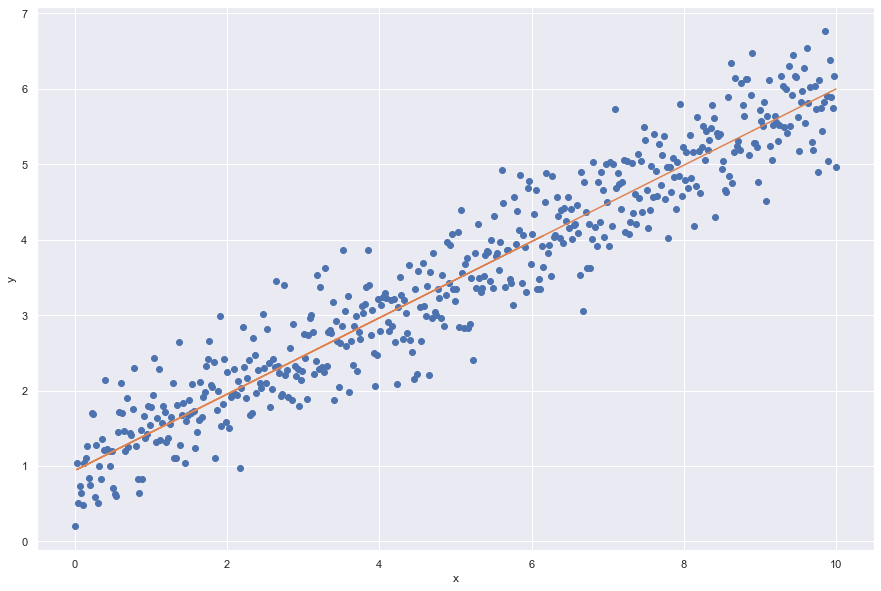

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(x, y, 'o')
plt.plot(X_test, linear_model.predict(X_test))
plt.xlabel('x')
plt.ylabel('y')